In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [30]:
import pandas
book=pd.read_csv("oneplus.txt",error_bad_lines=False)
book

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 4\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 22: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 4\n'


,x
0,pros:
1,2) AMOLED screen and 90Hz refresh rate really ...
2,3) Battery life is decent and will last a day ...
3,4) Sound quality is good and modestly loud. (D...
4,6) Gaming performance is average. (Similar pho...
5,7) The phone looks and feels premium while using.
6,8) The alert slider makes it very convenient t...
7,9) Face Unlock is as fast as other OnePlus pho...
8,Cons:
9,2) No headphone jack.


In [31]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['pros:',
 '2) AMOLED screen and 90Hz refresh rate really go along to make the display above average.',
 '3) Battery life is decent and will last a day on normal usage.',
 '4) Sound quality is good and modestly loud. (Drawback in Cons)',
 '6) Gaming performance is average. (Similar phones in this range have better gaming performances)',
 '7) The phone looks and feels premium while using.',
 '8) The alert slider makes it very convenient to switch between different modes.',
 '9) Face Unlock is as fast as other OnePlus phones. (Very very fast)',
 'Cons:',
 '2) No headphone jack.']

In [32]:
book

['pros:',
 '2) AMOLED screen and 90Hz refresh rate really go along to make the display above average.',
 '3) Battery life is decent and will last a day on normal usage.',
 '4) Sound quality is good and modestly loud. (Drawback in Cons)',
 '6) Gaming performance is average. (Similar phones in this range have better gaming performances)',
 '7) The phone looks and feels premium while using.',
 '8) The alert slider makes it very convenient to switch between different modes.',
 '9) Face Unlock is as fast as other OnePlus phones. (Very very fast)',
 'Cons:',
 '2) No headphone jack.',
 '4) No expandable memory slot.',
 "5) The plastic frame (doesn't look like plastic but it is) is a worrying thing and makes the phone *comparatively* less durable.",
 "6) Fingerprint scanner being under the screen isn't as quick as a traditional fingerprint scanner on the back.",
 "Update: Pixel 4a camera is surely much better that Nord's camera.",
 'Customer image']

In [18]:
nlp=spacy.load('en_core_web_sm')
one_block=book[6]
dock_block=nlp(one_block)
spacy.displacy.render(dock_block,style='ent',jupyter=True)

In [33]:
one_block

'8) The alert slider makes it very convenient to switch between different modes.'

In [34]:
for token in dock_block[0:20]:
    print(token,token.pos_)

8) NUM
The DET
alert ADJ
slider NOUN
makes VERB
it PRON
very ADV
convenient ADJ
to PART
switch VERB
between ADP
different ADJ
modes NOUN
. PUNCT


In [35]:
#FILTERING NOUNS AND VERB ONLY
nouns_verbs=[token.text for token in dock_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[1:20])

['makes', 'switch', 'modes']


In [36]:
# Joining the list into one string/text
text = ' '.join(book)
text

"pros: 2) AMOLED screen and 90Hz refresh rate really go along to make the display above average. 3) Battery life is decent and will last a day on normal usage. 4) Sound quality is good and modestly loud. (Drawback in Cons) 6) Gaming performance is average. (Similar phones in this range have better gaming performances) 7) The phone looks and feels premium while using. 8) The alert slider makes it very convenient to switch between different modes. 9) Face Unlock is as fast as other OnePlus phones. (Very very fast) Cons: 2) No headphone jack. 4) No expandable memory slot. 5) The plastic frame (doesn't look like plastic but it is) is a worrying thing and makes the phone *comparatively* less durable. 6) Fingerprint scanner being under the screen isn't as quick as a traditional fingerprint scanner on the back. Update: Pixel 4a camera is surely much better that Nord's camera. Customer image"

In [37]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'pros 2 AMOLED screen and 90Hz refresh rate really go along to make the display above average 3 Battery life is decent and will last a day on normal usage 4 Sound quality is good and modestly loud Drawback in Cons 6 Gaming performance is average Similar phones in this range have better gaming performances 7 The phone looks and feels premium while using 8 The alert slider makes it very convenient to switch between different modes 9 Face Unlock is as fast as other OnePlus phones Very very fast Cons 2 No headphone jack 4 No expandable memory slot 5 The plastic frame doesnt look like plastic but it is is a worrying thing and makes the phone comparatively less durable 6 Fingerprint scanner being under the screen isnt as quick as a traditional fingerprint scanner on the back Update Pixel 4a camera is surely much better that Nords camera Customer image'

In [38]:
import nltk
nltk.download('punkt')
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheth\AppData\Roaming\nltk_data...


['pros', '2', 'AMOLED', 'screen', 'and', '90Hz', 'refresh', 'rate', 'really', 'go', 'along', 'to', 'make', 'the', 'display', 'above', 'average', '3', 'Battery', 'life', 'is', 'decent', 'and', 'will', 'last', 'a', 'day', 'on', 'normal', 'usage', '4', 'Sound', 'quality', 'is', 'good', 'and', 'modestly', 'loud', 'Drawback', 'in', 'Cons', '6', 'Gaming', 'performance', 'is', 'average', 'Similar', 'phones', 'in', 'this']


[nltk_data]   Package punkt is already up-to-date!


In [39]:
len(text_tokens)

153

In [40]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['pros', '2', 'AMOLED', 'screen', '90Hz', 'refresh', 'rate', 'really', 'go', 'along', 'make', 'display', 'average', '3', 'Battery', 'life', 'decent', 'last', 'day', 'normal', 'usage', '4', 'Sound', 'quality', 'good', 'modestly', 'loud', 'Drawback', 'Cons', '6', 'Gaming', 'performance', 'average', 'Similar', 'phones', 'range', 'better', 'gaming', 'performances', '7']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['pros', '2', 'amoled', 'screen', '90hz', 'refresh', 'rate', 'really', 'go', 'along', 'make', 'display', 'average', '3', 'battery', 'life', 'decent', 'last', 'day', 'normal', 'usage', '4', 'sound', 'quality', 'good']


In [42]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['pro', '2', 'amol', 'screen', '90hz', 'refresh', 'rate', 'realli', 'go', 'along', 'make', 'display', 'averag', '3', 'batteri', 'life', 'decent', 'last', 'day', 'normal', 'usag', '4', 'sound', 'qualiti', 'good', 'modestli', 'loud', 'drawback', 'con', '6', 'game', 'perform', 'averag', 'similar', 'phone', 'rang', 'better', 'game', 'perform', '7']


In [43]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [44]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

pros 2 AMOLED screen 90Hz refresh rate really go along make display average 3 Battery life decent last day normal usage 4 Sound quality good modestly loud Drawback Cons 6 Gaming performance average Similar phones range better gaming performances 7


In [45]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['pro', '2', 'amoled', 'screen', '90hz', 'refresh', 'rate', 'really', 'go', 'along', 'make', 'display', 'average', '3', 'Battery', 'life', 'decent', 'last', 'day', 'normal', 'usage', '4', 'sound', 'quality', 'good']


In [46]:
#### Feature Extraction

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [48]:
print(vectorizer.vocabulary_)

{'pro': 54, 'amoled': 4, 'screen': 62, '90hz': 1, 'refresh': 60, 'rate': 58, 'really': 59, 'go': 28, 'along': 3, 'make': 39, 'display': 17, 'average': 5, 'battery': 7, 'life': 35, 'decent': 15, 'last': 33, 'day': 14, 'normal': 46, 'usage': 74, 'sound': 66, 'quality': 55, 'good': 29, 'modestly': 42, 'loud': 38, 'drawback': 19, 'cons': 11, 'gaming': 27, 'performance': 49, 'similar': 63, 'phone': 50, 'range': 57, 'well': 77, 'the': 69, 'look': 37, 'feel': 24, 'premium': 53, 'use': 75, 'alert': 2, 'slider': 64, 'convenient': 12, 'switch': 68, 'different': 16, 'mode': 41, 'face': 22, 'unlock': 72, 'fast': 23, 'oneplus': 48, 'very': 76, 'no': 44, 'headphone': 30, 'jack': 32, 'expandable': 21, 'memory': 40, 'slot': 65, 'plastic': 52, 'frame': 26, 'do': 18, 'nt': 47, 'like': 36, 'worrying': 78, 'thing': 70, 'comparatively': 10, 'less': 34, 'durable': 20, 'fingerprint': 25, 'scanner': 61, 'be': 8, 'quick': 56, 'traditional': 71, 'back': 6, 'update': 73, 'pixel': 51, '4a': 0, 'camera': 9, 'surel

In [49]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['phone', 'pixel', 'plastic', 'premium', 'pro', 'quality', 'quick', 'range', 'rate', 'really', 'refresh', 'scanner', 'screen', 'similar', 'slider', 'slot', 'sound', 'surely', 'switch', 'the', 'thing', 'traditional', 'unlock', 'update', 'usage', 'use', 'very', 'well', 'worrying']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
print(X.toarray().shape)

(111, 79)


In [51]:
#### Let's see how can bigrams and trigrams can be included here

In [52]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [53]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['4a', 'and', 'as', 'average', 'better', 'camera', 'cons', 'fast', 'fingerprint', 'fingerprint scanner', 'gaming', 'in', 'is', 'it', 'makes', 'makes it', 'makes it very', 'makes the', 'makes the phone', 'memory', 'memory slot', 'modes', 'modestly', 'modestly loud', 'modestly loud drawback', 'much', 'much better', 'much better that', 'no', 'no expandable', 'no expandable memory', 'no headphone', 'no headphone jack', 'nord', 'nord camera', 'normal', 'normal usage', 'on', 'on normal', 'on normal usage', 'on the', 'on the back', 'oneplus', 'oneplus phones', 'oneplus phones very', 'other', 'other oneplus', 'other oneplus phones', 'performance', 'performance is', 'performance is average', 'performances', 'phone', 'phone comparatively', 'phone comparatively less', 'phone looks', 'phone looks and', 'phones', 'phones in', 'phones in this', 'phones very', 'phones very very', 'pixel', 'pixel 4a', 'pixel 4a camera', 'plastic', 'plastic but', 'plastic but it', 'plastic frame', 'plastic frame doesn'

In [54]:
#### TFidf vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['4a', '4a camera', '4a camera is', '90hz', '90hz refresh', '90hz refresh rate', 'above', 'above average', 'alert', 'alert slider', 'alert slider makes', 'along', 'along to', 'along to make', 'amoled', 'amoled screen', 'amoled screen and', 'and', 'and 90hz', 'and 90hz refresh', 'and feels', 'and feels premium', 'and makes', 'and makes the', 'and modestly', 'and modestly loud', 'and will', 'and will last', 'as', 'as fast', 'as fast as', 'as other', 'as other oneplus', 'as quick', 'as quick as', 'as traditional', 'as traditional fingerprint', 'average', 'average similar', 'average similar phones', 'back', 'battery', 'battery life', 'battery life is', 'being', 'being under', 'being under the', 'better', 'better gaming', 'better gaming performances', 'better that', 'better that nord', 'between', 'between different', 'between different modes', 'but', 'but it', 'but it is', 'camera', 'camera is', 'camera is surely', 'comparatively', 'comparatively less', 'comparatively less durable', 'cons',

In [56]:
####  Generate wordcloud

In [57]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

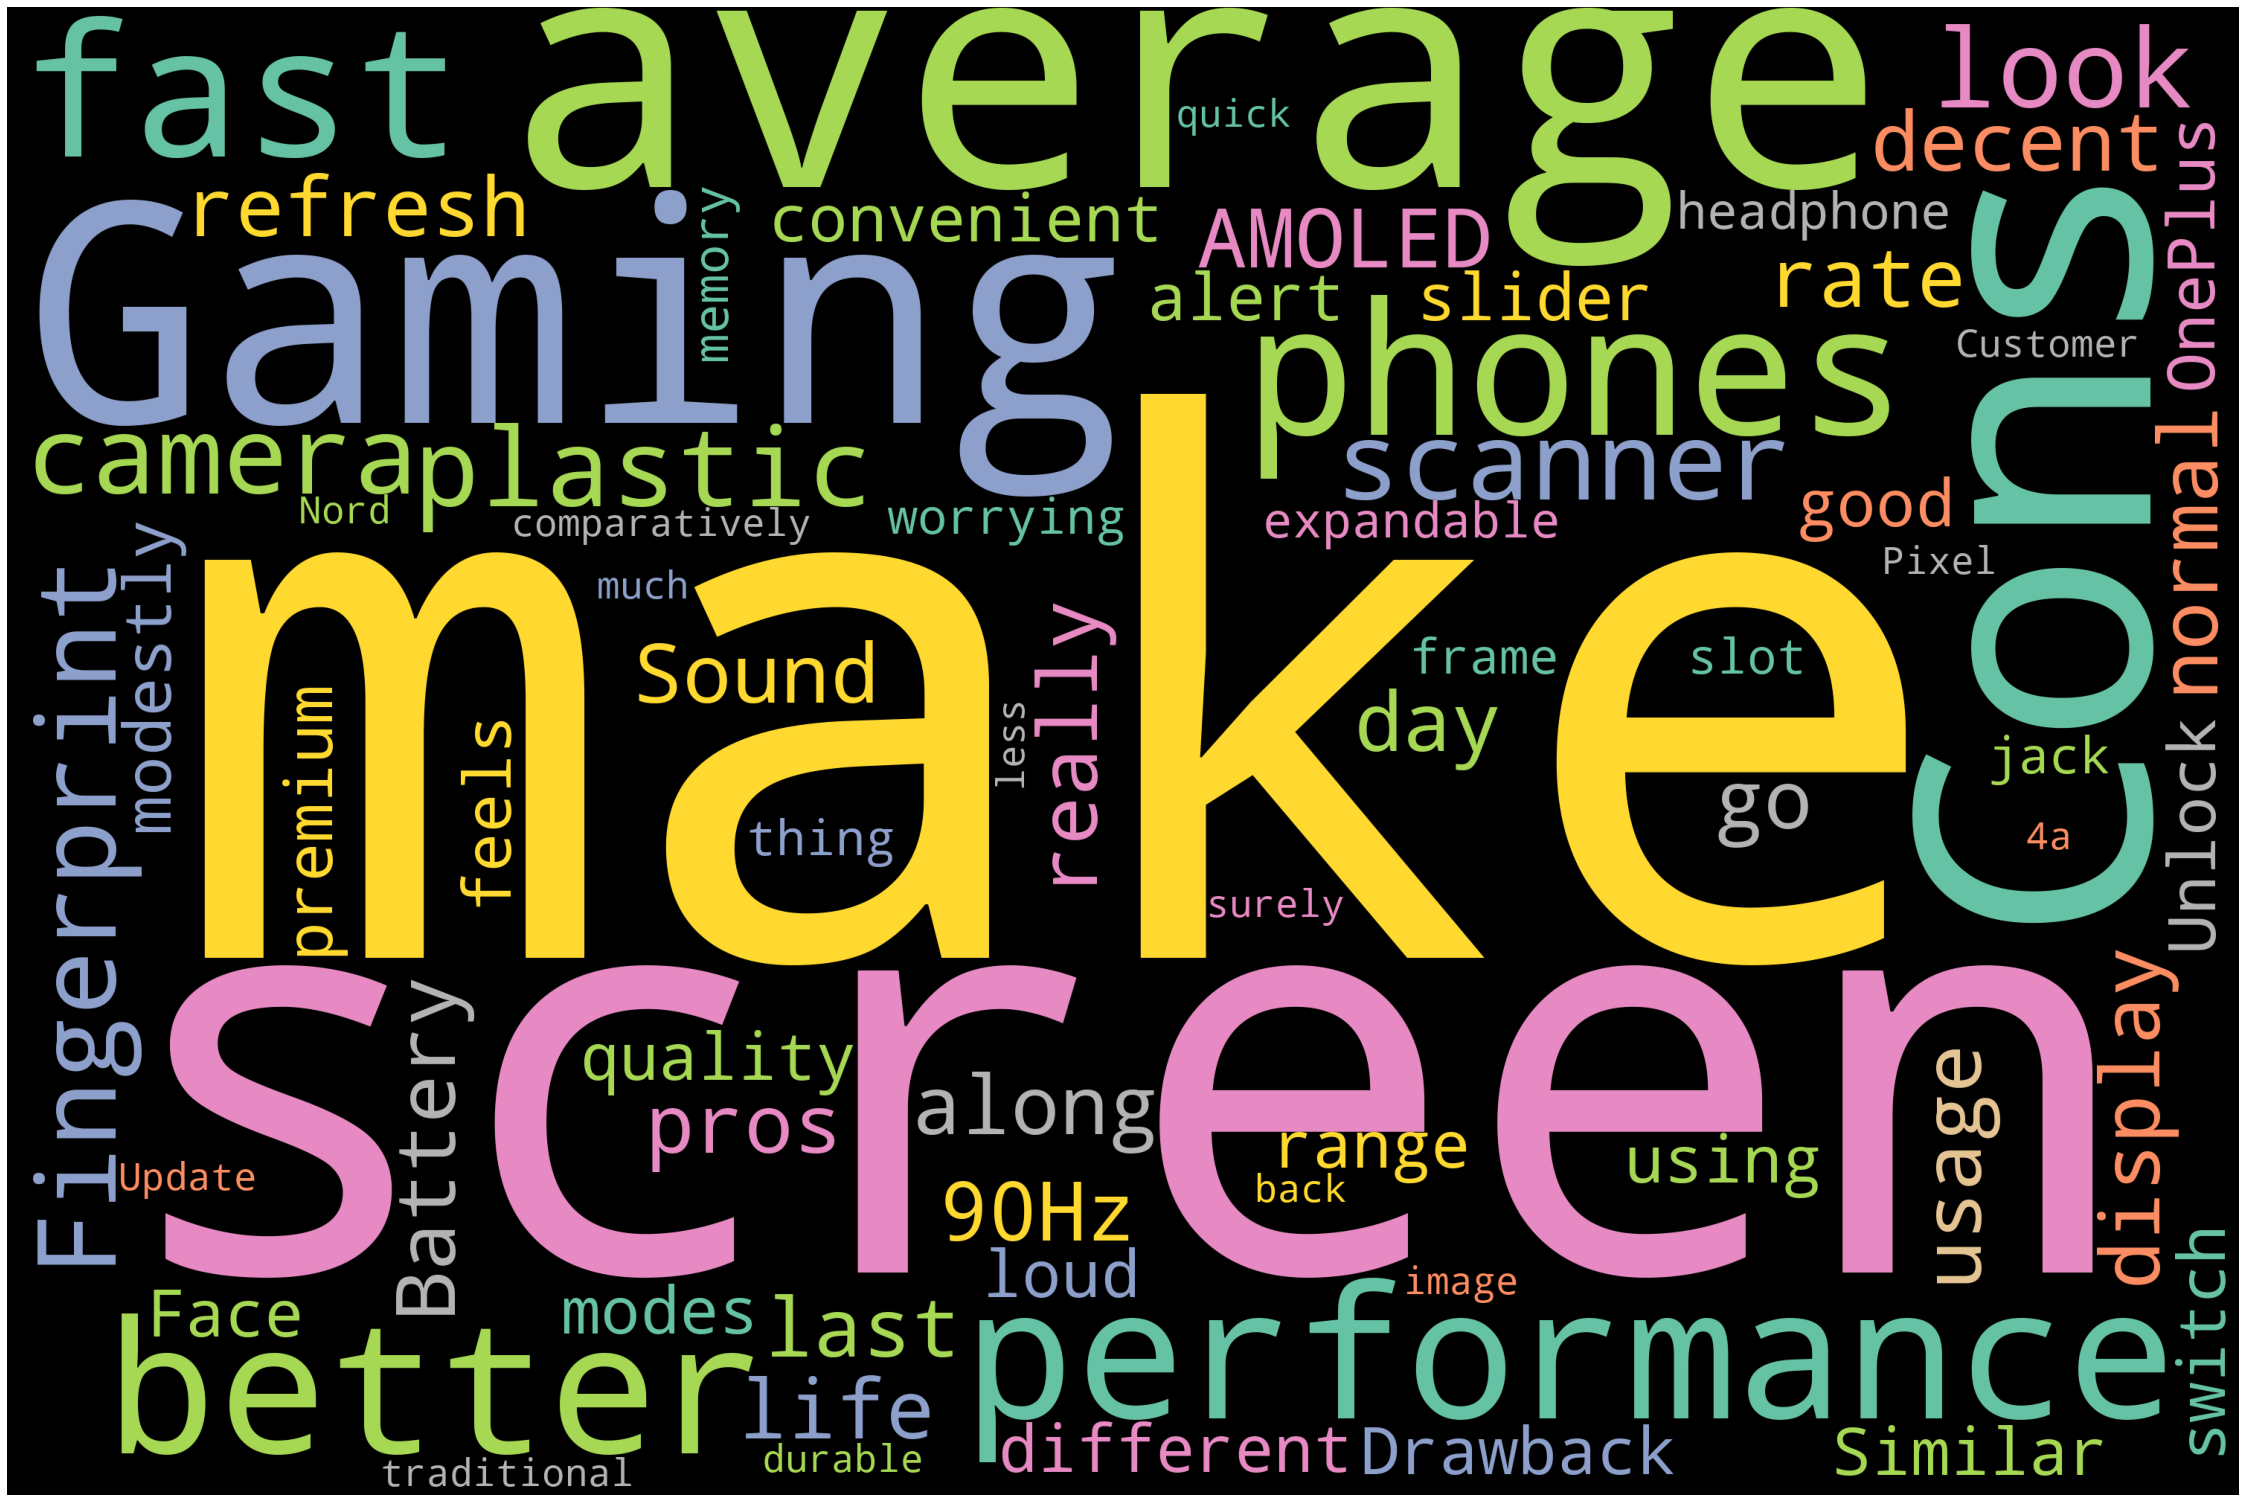

In [60]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('phone')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [59]:
# Save image
#wordcloud.to_file("wordcloud.png")